In [4]:
import cv2
import face_recognition
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

In [5]:
#Extracts the nth frame from the video
def extract_nth_frame(video_path, frame_num):
    # Load the video
    cap = cv2.VideoCapture(video_path)

    # Set the frame position to the 99th frame (since frame count starts from 0)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num-1)

    # Read the 100th frame
    ret, frame = cap.read()
    
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    cap.release()
    
    return frame_rgb

#extract faces from a frame
def extract_faces(video_path):
    face_image_list = []
    
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    for i in range(1, total_frames, 10):
        print(i)
        image = extract_nth_frame(video_path, i)
        face_locations = face_recognition.face_locations(image)

        for index, face_location in enumerate(face_locations):
            top, right, bottom, left = face_location

            # Extract the face from the original image
            face_image = Image.fromarray(image[top:bottom, left:right])
            # face_image.show()
            face_image_list.append(face_image)
        
    return face_image_list

def get_face_encoding(image):
    image_np = np.array(image)
    encodings = face_recognition.face_encodings(image_np)
    if encodings:
        return encodings[0]
    return None

#Remove duplicate images
def deduplicate_images(image_paths):
    encodings = []
    unique_image_paths = []

    for image_path in image_paths:
        encoding = get_face_encoding(image_path)
        if encoding is None:
            print(f"No face detected in {image_path}.")
            continue

        # Compare the current encoding with previous encodings
        matches = face_recognition.compare_faces(encodings, encoding, tolerance=0.5)
        if True not in matches:
            encodings.append(encoding)
            unique_image_paths.append(image_path)

    return unique_image_paths

#put the images on a single plot
def plot_images(image_list, columns=5):
    """
    Plots multiple images in a grid format.

    Parameters:
    - image_list: List of images (PIL Image objects or NumPy arrays).
    - columns: Number of columns for the grid.
    """
    rows = (len(image_list) // columns) + int(len(image_list) % columns != 0)
    
    # Create a new figure
    plt.figure(figsize=(20, 8))
    
    for i, img in enumerate(image_list, 1):
        plt.subplot(rows, columns, i)
        if isinstance(img, np.ndarray):  # Check if the image is a NumPy array
            plt.imshow(img)
        else:  # Assume it's a PIL Image object
            plt.imshow(img)
        plt.axis('off')  # Hide

1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
161
171
181
191
201
211
221
231
241
251
261
271
281
291
301
311
321
331
341
351
361
371
381
391
401
411
421
431
441
451
461
471
481
491
501
511
521
531
541
551
561
571
581
591
601
611
621
631
641
651
661
671
681
691
701
711
721
731
741
751
761
771
781
791
801
811
821
831
841
851
861
871
881
891
901
911
921
931
941
951
961
971
981
991
1001
1011
1021
1031
1041
1051
1061
1071
1081
1091
1101
1111
1121
1131
1141
1151
1161
1171
1181
1191
1201
1211
1221
1231
1241
1251
1261
1271
1281
1291
1301
1311
1321
1331
1341
1351
1361
1371
1381
1391
1401
1411
1421
1431
1441
1451
1461
1471
1481
1491
1501
1511
1521
1531
1541
1551
1561
1571
1581
1591
1601
1611
1621
1631
1641
1651
1661
1671
1681
1691
1701
1711
1721
1731
1741
1751
1761
1771
1781
1791
1801
1811
1821
1831
1841
1851
1861
1871
1881
1891
1901
1911
1921
1931
1941
1951
1961
1971
1981
1991
2001
2011
2021
2031
2041
2051
2061
2071
2081
2091
2101
2111
2121
2131
2141
2151
2161
2171
2181
2191
2201
2211
2

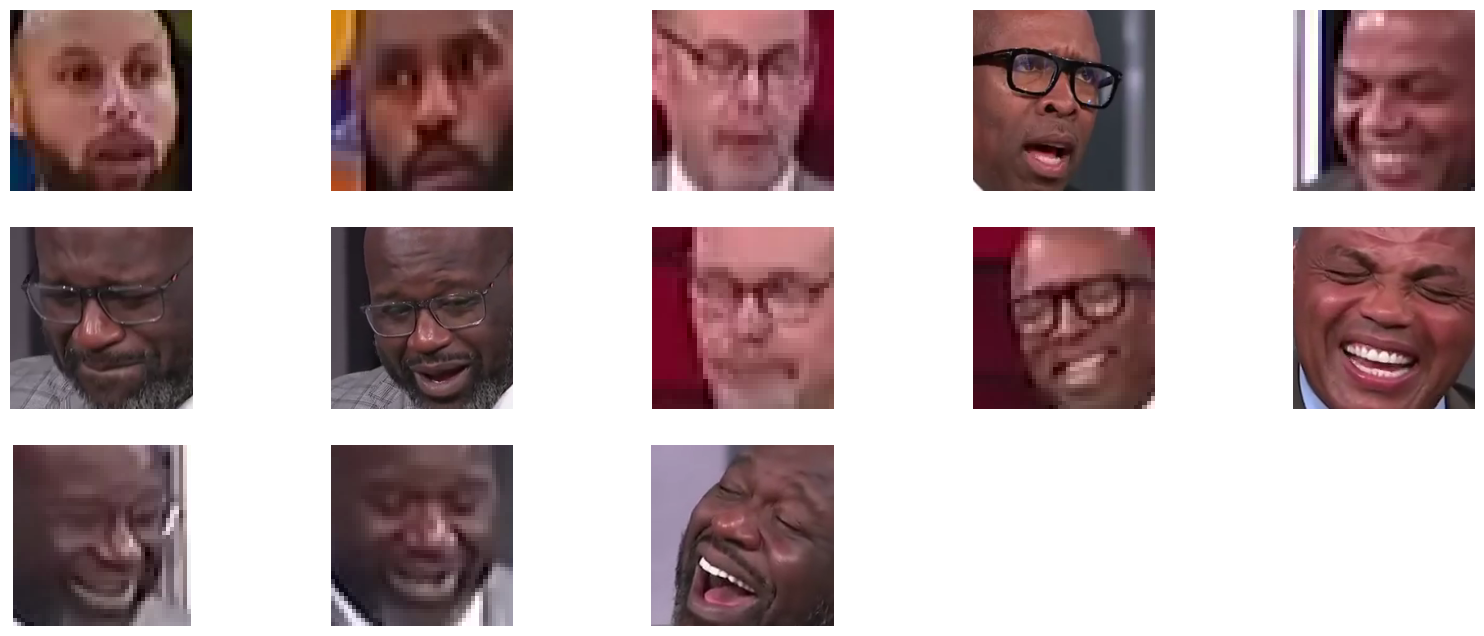

In [6]:
# video_path = "I am become death....mp4"
video_path = "input_data/Shaq and Chuck Can't Stop Laughing 🤣🤣🤣.mp4"
face_list = extract_faces(video_path)

unique_face_list = deduplicate_images(face_list)

print(f"all face image count {len(face_list)}")
print(f"unique face image count {len(unique_face_list)}")
    
plot_images(unique_face_list)